# Assignment-1

In [33]:
# Importing and adding required packages
import Pkg
Pkg.add("Distributions")
using Distributions, Random

   Resolving package versions...
  No Changes to `C:\Users\ashar\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\ashar\.julia\environments\v1.7\Manifest.toml`


## 1. Implement a Discrete Inverse Transform sampler for Poisson distribution.

In [2]:
# Arrays for storing obatained samples and uniform draws
arr=[] 
Xo_arr=[]

# Function which returns index when cumulative probabilty is greater than Uniform draw
function dis_inv(lambda)
    p=exp(-lambda)
    a=p
    Xo = rand(Uniform(0,1))
    push!(Xo_arr,Xo)
    for i in 0:10000      
        if Xo < a
            return i
        else
            p = (lambda/(i+1))*p
            a = a + p
        end
    end
end

# Loop for 
for j in 0:4999
    push!(arr,dis_inv(10))
end

In [3]:
# Printing stored arrays and length of arrays
println(arr)
println(Xo_arr)
length(arr)

Any[9, 13, 5, 8, 12, 11, 7, 9, 15, 10, 4, 8, 12, 11, 7, 9, 10, 10, 9, 9, 8, 12, 7, 6, 12, 7, 8, 12, 18, 10, 6, 12, 8, 14, 11, 9, 9, 14, 14, 7, 10, 8, 7, 12, 5, 9, 10, 8, 16, 9, 11, 8, 4, 13, 10, 9, 15, 12, 8, 13, 10, 7, 8, 9, 9, 10, 9, 8, 13, 7, 9, 11, 9, 9, 11, 9, 10, 10, 9, 13, 9, 9, 8, 7, 10, 12, 9, 5, 13, 5, 15, 11, 14, 10, 7, 9, 10, 12, 7, 7, 7, 10, 7, 10, 9, 11, 13, 9, 14, 10, 15, 7, 8, 14, 15, 11, 7, 12, 12, 12, 6, 7, 9, 13, 13, 11, 10, 5, 16, 12, 18, 12, 8, 8, 13, 13, 10, 8, 9, 9, 8, 14, 6, 13, 15, 9, 11, 13, 11, 10, 13, 11, 12, 5, 7, 10, 8, 16, 9, 8, 12, 12, 10, 8, 10, 14, 7, 7, 10, 4, 15, 5, 7, 4, 8, 10, 17, 7, 6, 13, 4, 10, 6, 13, 13, 10, 9, 9, 9, 7, 9, 11, 10, 12, 10, 7, 11, 9, 12, 11, 13, 10, 11, 8, 10, 10, 13, 9, 6, 8, 8, 7, 13, 15, 7, 5, 9, 10, 11, 11, 8, 12, 9, 5, 17, 12, 13, 13, 10, 10, 8, 9, 14, 8, 11, 9, 7, 6, 6, 7, 7, 9, 8, 15, 12, 15, 7, 15, 5, 9, 6, 9, 7, 7, 5, 8, 8, 11, 10, 10, 8, 6, 6, 6, 14, 9, 7, 16, 6, 15, 4, 12, 6, 10, 8, 5, 7, 8, 8, 9, 18, 15, 13, 9, 8, 7, 

5000

In [5]:
using Plots

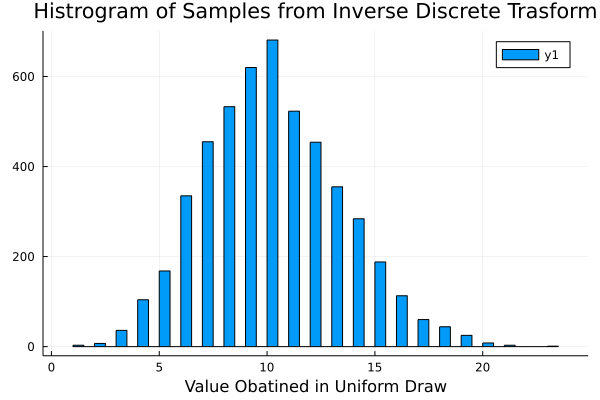

In [18]:
# Plotting Histogram for the inverse discrete tranform sampling mehthod
y=Xo_arr
x=arr
plot(histogram(x, title = "Histrogram of Samples from Inverse Discrete Trasform"))
xlabel!("Value Obatined in Uniform Draw")

In [25]:
# Measure of dispersion
mean_x = sum(arr)/5000
var_x = (sum((x .- mean_x) .^ 2))/ 5000
println("Mean = " , mean_x)
println("Variance = ", var_x)

Mean = 10.002
Variance = 9.7185424


## 2. Implement a Discrete Accept Reject Sampler to simulate draws from Binomial(n, p) using a Poisson proposal.


In [11]:
# Calculation the ratio of Binomial distribution/ Poisson distribution
function ratio(λ,i,n,p)
    return (binomial(n,i)*(p^i)*(1-p)^(n-i)*factorial(big(i)))/(exp(-λ)*(λ^i))
end


function draw_pois(n,p,λ)
    
    accept = 0
    c = ratio(4,0,n,p)
# Obtaining the supremum of P_j/Q_j    
    for i in 1:n
        Ci = ratio(λ,i,n,p)
        if Ci > c
            c = Ci
        end
    end
# Classical accept reject Algorithm when the random draw from poisson distribution is used to check the value of ratio at 
# that value and if the value of uniform draw is less than the required ratio value.
    while accept == 0
        U = rand(Uniform(0,1))
        
        x = dis_inv(λ)
        
        ratio_req = ratio(λ,x,n,p)
        if U < ratio_req
            accept = 1
            return x
        else
            x = x + 1
        end
    end
    
end

draw_pois (generic function with 1 method)

In [12]:
arr_1 = []
for i in 0:999
    push!(arr_1 , draw_pois(10,0.4,5))
end

In [13]:
println(arr_1)

Any[6, 5, 2, 3, 6, 6, 5, 5, 3, 3, 4, 5, 3, 3, 5, 5, 4, 6, 4, 5, 4, 2, 2, 0, 0, 1, 6, 5, 5, 5, 5, 8, 3, 0, 2, 5, 5, 5, 6, 3, 1, 6, 6, 4, 4, 4, 3, 4, 1, 5, 7, 1, 3, 5, 5, 3, 3, 3, 4, 5, 4, 5, 6, 5, 6, 3, 3, 5, 4, 5, 3, 5, 2, 1, 4, 7, 2, 4, 5, 4, 5, 4, 4, 7, 5, 4, 1, 2, 4, 6, 6, 5, 5, 4, 2, 3, 2, 4, 6, 4, 5, 6, 7, 6, 5, 5, 5, 2, 3, 4, 6, 3, 3, 4, 4, 5, 5, 6, 2, 5, 5, 3, 4, 6, 6, 1, 5, 4, 5, 3, 3, 7, 3, 4, 3, 5, 1, 4, 7, 2, 3, 2, 0, 5, 6, 8, 3, 1, 3, 4, 1, 3, 1, 3, 1, 7, 3, 6, 4, 3, 4, 2, 2, 3, 6, 7, 2, 4, 4, 5, 3, 2, 2, 7, 0, 5, 5, 4, 7, 3, 5, 5, 2, 1, 2, 8, 4, 4, 4, 2, 4, 4, 4, 4, 6, 3, 3, 3, 4, 3, 4, 2, 2, 2, 2, 6, 4, 4, 4, 3, 3, 4, 4, 4, 2, 4, 5, 4, 3, 5, 4, 5, 6, 2, 4, 2, 6, 4, 4, 7, 4, 5, 5, 2, 5, 3, 6, 5, 6, 4, 4, 4, 2, 4, 5, 3, 6, 5, 5, 5, 2, 3, 5, 5, 5, 6, 6, 2, 5, 5, 4, 5, 5, 2, 5, 6, 6, 5, 4, 0, 5, 2, 2, 2, 5, 6, 5, 4, 5, 3, 3, 1, 4, 6, 6, 2, 5, 6, 5, 6, 5, 5, 2, 2, 6, 3, 2, 3, 4, 5, 6, 7, 2, 6, 0, 6, 4, 5, 4, 1, 5, 3, 5, 2, 3, 3, 5, 6, 3, 5, 5, 8, 1, 3, 1, 6, 3, 6, 4, 3, 6, 4, 

In [17]:
# Measures off Dispersion
mean_draws = sum(arr_1)/length(arr_1)
var_draws = (sum((arr_1 .- mean_draws) .^ 2))/ 1000
println("Mean = " , mean_draws)
println("Variance = ", var_draws)

Mean = 4.141
Variance = 2.6671189999999996


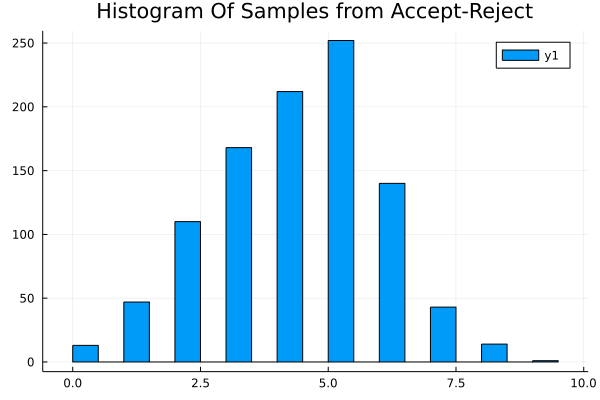

In [20]:
# Histrogram for Accept Reject
plot(histogram(arr_1), title="Histogram Of Samples from Accept-Reject")